In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
color = sns.color_palette()
import plotly.graph_objects as go

%matplotlib inline

Confirmed CAses
==

In [2]:
confirmed_cases = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_cases = pd.read_csv(confirmed_cases)
confirmed_cases.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
109,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,...,149,151,152,152,152,152,152,152,153,154
92,Faroe Islands,Denmark,61.8926,-6.9118,0,0,0,0,0,0,...,187,187,187,187,187,187,187,187,187,187
145,NaN,Kyrgyzstan,41.2044,74.7661,0,0,0,0,0,0,...,729,746,756,769,795,830,843,871,895,906
163,NaN,Morocco,31.7917,-7.0926,0,0,0,0,0,0,...,4321,4423,4569,4729,4903,5053,5219,5408,5548,5711
186,NaN,Romania,45.9432,24.9668,0,0,0,0,0,0,...,11978,12240,12567,12732,13163,13512,13837,14107,14499,14811


The record with Province/State = 'Recovered' looks like an anomaly. It's latitude and longitude 0, 0 and located somewhere in the Gulf of Guinea, far far away from Canada. Plus, it has a value of 0 for all the dates. When analysing data, care needs to be taken when tagging something as an anomay. It could be a very interesting data point. In our case, this record looks way off. We can investigate this using other means; like contacting the admins of the website this data came from. For now, we'll drop such records.


In [5]:
confirmed_cases[confirmed_cases['Province/State'] == 'Recovered']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
238,Recovered,Canada,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
confirmed_cases = confirmed_cases[confirmed_cases['Province/State'] != 'Recovered']

In [114]:
confirmed_cases[confirmed_cases['Country/Region'] == 'Diamond Princess'] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
88,NaN,Diamond Princess,0.0,0.0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712


1. Diamond Princess is within Canada, as seen in the confirmed deaths data. Hence we'll manually adjust this value.
2. the order in which we do this is important. If we change the country first, then on the next filter, we'll have multiple records since canada has multiple provinces.

In [7]:
confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Diamond Princess', 'Province/State'] = 'Diamond Princess'
confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Diamond Princess', 'Country/Region'] = 'Canada'

In [8]:
confirmed_cases.shape

(265, 112)

Confirmed Deaths
==

In [10]:
confirmed_deaths ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
confirmed_deaths = pd.read_csv(confirmed_deaths)
confirmed_deaths.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
75,Shanxi,China,37.577700,112.292200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,NaN,Madagascar,-18.766900,46.869100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,NaN,Peru,-9.190000,-75.015200,0,0,0,0,0,0,...,943,1051,1124,1200,1286,1344,1444,1533,1627,1714
196,NaN,Singapore,1.283300,103.833300,0,0,0,0,0,0,...,14,15,16,17,18,18,18,20,20,20


In [11]:
confirmed_deaths = confirmed_deaths[confirmed_deaths['Province/State'] != 'Recovered']

In [12]:
confirmed_deaths.shape

(265, 112)

Confirmed Recoveries
== 

In [13]:
confirmed_recovered ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
confirmed_recovered = pd.read_csv(confirmed_recovered)
confirmed_recovered.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7,7,11,11,11,11,11,11,11,11
232,NaN,Laos,19.85627,102.495496,0,0,0,0,0,0,...,7,8,8,9,9,9,9,10,9,9
213,NaN,Turkey,38.96370,35.243300,0,0,0,0,0,0,...,44040,48886,53808,58259,63151,68166,73285,78202,82984,86396
11,Queensland,Australia,-28.01670,153.400000,0,0,0,0,0,0,...,943,948,965,976,980,980,985,989,994,1019
229,NaN,Zambia,-15.41670,28.283300,0,0,0,0,0,0,...,54,55,74,75,78,78,92,101,103,111


In [14]:
confirmed_recovered.shape

(252, 112)

'Tidying' our datasets
==

1. Melt data into tidy format
2. We'll fill up all States/Provinces with the Country/State when they are null

In [15]:
df_confirmed = confirmed_cases.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed_Cases')
df_confirmed['Province/State'] = df_confirmed['Province/State'].fillna(df_confirmed['Country/Region'])
df_confirmed['Date'] = pd.to_datetime(df_confirmed['Date'])

df_confirmed.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed_Cases
1902,Chad,Chad,15.4542,18.7322,2020-01-29,0
28260,New Zealand,New Zealand,-40.9006,174.8860,2020-05-07,1490
11748,Diamond Princess,Canada,0.0000,0.0000,2020-03-06,706
10841,Guinea-Bissau,Guinea-Bissau,11.8037,-15.1804,2020-03-02,0
17773,Bahamas,Bahamas,25.0343,-77.3963,2020-03-29,11


In [16]:
df_confirmed.shape

(28620, 6)

In [17]:
df_deaths = confirmed_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Death_Cases')
df_deaths['Province/State'] = df_deaths['Province/State'].fillna(df_deaths['Country/Region'])
df_deaths['Date'] = pd.to_datetime(df_deaths['Date'])

df_deaths.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Death_Cases
28074,British Virgin Islands,United Kingdom,18.4207,-64.6400,2020-05-06,1
1009,Uganda,Uganda,1.0000,32.0000,2020-01-25,0
28269,Papua New Guinea,Papua New Guinea,-6.3150,143.9555,2020-05-07,0
19616,Argentina,Argentina,-38.4161,-63.6167,2020-04-05,44
13734,Channel Islands,United Kingdom,49.3723,-2.3644,2020-03-13,0


In [18]:
df_deaths.shape

(28620, 6)

In [19]:
df_recovered = confirmed_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered_Cases')
df_recovered['Province/State'] = df_recovered['Province/State'].fillna(df_recovered['Country/Region'])
df_recovered['Date'] = pd.to_datetime(df_recovered['Date'])

df_recovered.sample(5)

,Province/State,Country/Region,Lat,Long,Date,Recovered_Cases
8215,Malta,Malta,35.93750,14.375400,2020-02-23,0
25180,Laos,Laos,19.85627,102.495496,2020-04-30,8
9671,Eswatini,Eswatini,-26.52250,31.465900,2020-02-29,0
16485,Reunion,France,-21.13510,55.247100,2020-03-27,1
26571,Georgia,Georgia,42.31540,43.356900,2020-05-06,269


1. Combine the 3 datasets into one where we have confirmed cases, deaths and recoveries.
2. We'll use left joins to combine the 3 datasets starting from confirmed. This is because, the confirmed cases ideally holds more recrods than deaths/recovered. So the dataframe with the confirmed cases will be our central dataframe.

In [26]:
df = df_confirmed.merge(df_deaths, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'], how='left')
df = df.merge(df_recovered, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'], how='left')

In [28]:
df.shape

(28620, 8)

In [29]:
df = df.rename(columns={'Province/State': 'Province_State', 'Country/Region': 'Country_Region'})
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed_Cases,Death_Cases,Recovered_Cases
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0


We have a number of null recovered cases because the number of records in the recovered dataframe were fewer than the confirmed cases

In [32]:
df.isnull().sum().sort_values(ascending=False)

Recovered_Cases    1944
Death_Cases           0
Confirmed_Cases       0
Date                  0
Long                  0
Lat                   0
Country_Region        0
Province_State        0
dtype: int64

In [33]:
df.describe()

,Lat,Long,Confirmed_Cases,Death_Cases,Recovered_Cases
count,28620.000000,28620.000000,2.862000e+04,28620.000000,26676.000000
mean,21.339583,22.517150,3.588776e+03,236.949825,1062.647698
std,24.713763,70.466615,3.367169e+04,2336.841516,7977.207697
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,7.000000,-19.020800,0.000000e+00,0.000000,0.000000
50%,23.634500,20.939400,1.200000e+01,0.000000,1.000000
75%,41.153300,78.000000,3.010000e+02,3.000000,74.000000
max,71.706900,178.065000,1.283929e+06,77180.000000,198993.000000


In [34]:
df.shape

(28620, 8)

In [35]:
df.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date',
       'Confirmed_Cases', 'Death_Cases', 'Recovered_Cases'],
      dtype='object')

In [20]:
df.dtypes

Province_State      object
Country_Region      object
Lat                float64
Long               float64
Date                object
Confirmed_Cases      int64
Death_Cases          int64
Recovered_Cases    float64
dtype: object

In [21]:
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed_Cases,Death_Cases,Recovered_Cases
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0.0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0.0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0.0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0.0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0.0


In [22]:
?WordCloud

In [140]:
df['Country_Region'].replace(' ', '_', regex=True)


0                  Afghanistan
1                      Albania
2                      Algeria
3                      Andorra
4                       Angola
                 ...          
28615           Western_Sahara
28616    Sao_Tome_and_Principe
28617                    Yemen
28618                  Comoros
28619               Tajikistan
Name: Country_Region, Length: 28620, dtype: object

In [141]:
df['Country_Region'].nunique()

186

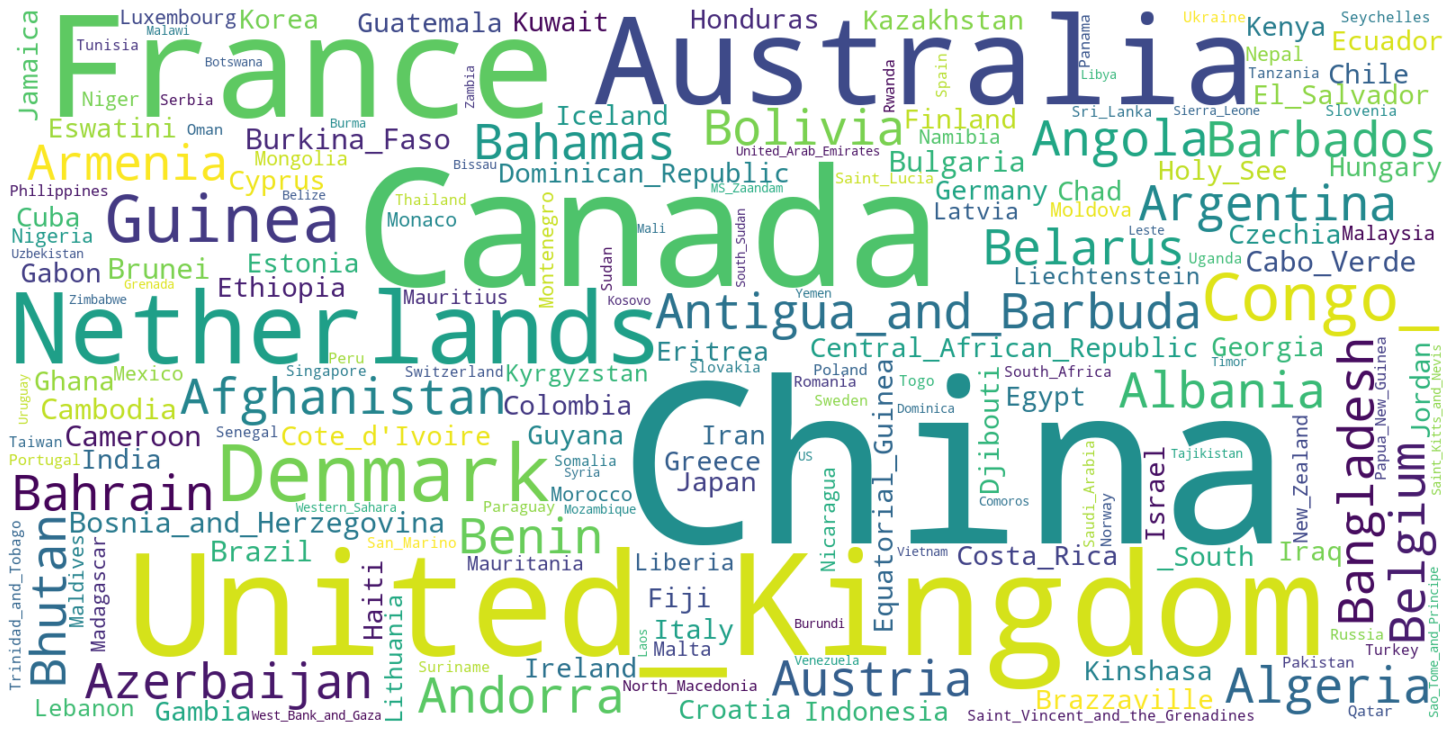

<Figure size 432x288 with 0 Axes>

In [142]:

wc = WordCloud(max_font_size=250,collocations=False, 
                       max_words=1000,width=1600, 
               height=800,background_color="white").generate(' '.join(df['Country_Region'].replace(' ', '_', regex=True)))
plt.figure( figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig('Country_Cloud.png')

In [26]:
df

,Province_State,Country_Region,Lat,Long,Date,Confirmed_Cases,Death_Cases,Recovered_Cases
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0,0,0.0
6,NaN,Argentina,-38.416100,-63.616700,1/22/20,0,0,0.0
7,NaN,Armenia,40.069100,45.038200,1/22/20,0,0,0.0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0,0,0.0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0,0,0.0
